<a href="https://colab.research.google.com/github/TobilobaOk/Predicting-Nigeria-House-prices/blob/main/Copy_of_My_Project_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Prediction in Nigeria

#**Problem Statement**

*  The goal is to create a model that can predict house prices in Nigeria
using machine learning (Ridge_Regression_Model)  

* Real estate agents, buyers, and investors needs have access to  market-driven pricing that can assist them in making informed decisions.

*  The model takes values of property feartures such as numbers of bedrooms, bathrooms, parking space and various type of houses to predict apartment prices in Nigeria






#**Data Source**

The dataset was obtained from an online data repository  of real life data sets, stored in a csv file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.5 MB/s eta 0:00:00


#**Import Data And Libries**

In [ ]:
#import Statement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.utils.validation import check_is_fitted
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

import warnings
warnings.filterwarnings('ignore')
import pickle
from google.colab import files

df=pd.read_csv("/content/drive/MyDrive/pluralcode data science/Nigeria_houses_data.csv")

In [ ]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


#**Understand the Data**

In [ ]:
# Display the structure of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [ ]:
#Display summary statistics

df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


#**Handle Irregularities**

In [ ]:
# Check for missing values


df.isnull().any(axis=1).sum()

np.int64(0)

In [ ]:
trimmed_df_lagos = df[df["state"]=="Lagos"]
trimmed_df_lagos

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
trimmed_df_lagos["town"].value_counts()

,count
town,
Lekki,10841
Ajah,2142
Ikoyi,1541
Ikeja,686
Victoria Island (VI),493
Ibeju Lekki,492
Magodo,375
Ikorodu,236
Isheri North,194


#**Exploratory Data Analysis**

In [ ]:
# Display the first few rows dataset

df.head(5)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [ ]:
df["state"].value_counts()

,count
state,
Lagos,18445
Abuja,3524
Ogun,637
Oyo,477
Rivers,444
Imo,246
Anambara,145
Enugu,128
Edo,100


In [ ]:
# Unique number of states
state_no = df["state"].nunique()
print(f"There are {state_no} unique states in the dataset")

# Unique number of towns
towns_no = df["town"].nunique()
print(f"There are {towns_no} unique towns in the dataset")

There are 25 unique states in the dataset
There are 189 unique towns in the dataset


In [ ]:
df['title'].unique() #check for type of houses

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [ ]:
df["title"].value_counts()

,count
title,
Detached Duplex,13992
Terraced Duplexes,3237
Semi Detached Duplex,2615
Detached Bungalow,2108
Block of Flats,1745
Semi Detached Bungalow,452
Terraced Bungalow,177


<Axes: xlabel='state'>

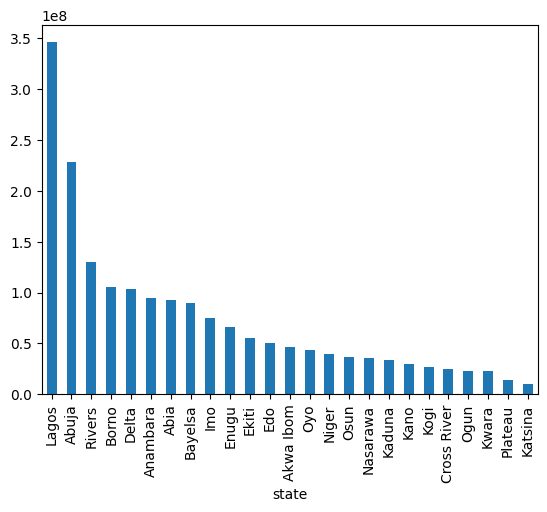

In [ ]:
df.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='town'>

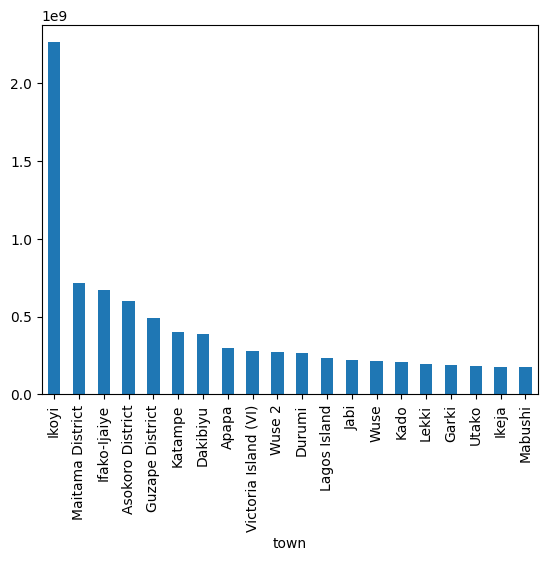

In [ ]:
df.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

**Handle Outlier Values**

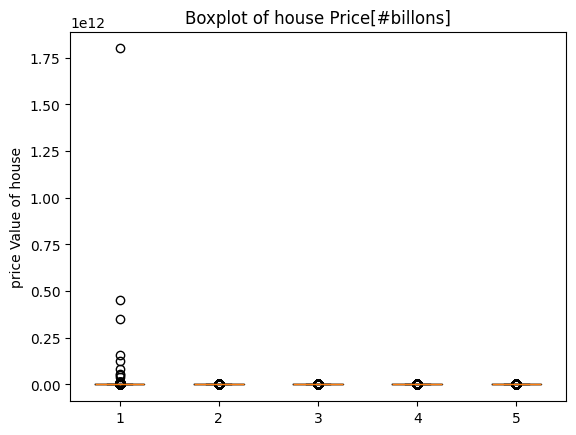

In [ ]:
plt.boxplot(df[["price","bedrooms","parking_space","bathrooms","toilets"]])
plt.title("Boxplot of house Price[#billons]")
plt.ylabel("price Value of house")
plt.show()

In [ ]:
# handling the outlier values by flooring them

# first step: get the 25th and 75th percentiles
Q1 = df["price"].quantile(0.25)
Q2 = df["price"].quantile(0.75)

# second step: calculate inter-quartile range
IQR = Q2 - Q1

# get the lower and upper bounds using 25th and 75th percentiles, and inter-quartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

# floor the outliers: replace outliers with lower & upper bounds
df["price"] = np.where(df["price"] > upper_bound, upper_bound, df["price"])


In [ ]:
record= df["state"].value_counts()
record

,count
state,
Lagos,18445
Abuja,3524
Ogun,637
Oyo,477
Rivers,444
Imo,246
Anambara,145
Enugu,128
Edo,100


#**Trimmed Dataframe**

In [ ]:
# remove the states with few entries
trimmed_df = df[~df['state'].isin(record[record < 100].index)]

In [ ]:
trimmed_df["state"].value_counts()

,count
state,
Lagos,18445
Abuja,3524
Ogun,637
Oyo,477
Rivers,444
Imo,246
Anambara,145
Enugu,128
Edo,100


<Axes: title={'center': 'Most Expensive towns in nigeria'}, xlabel='town'>

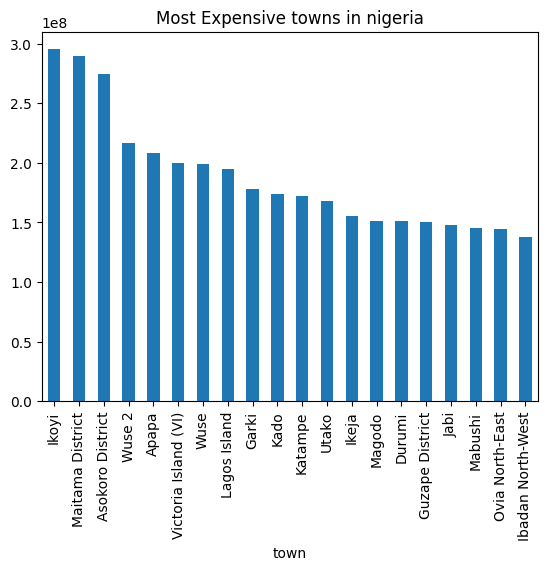

In [ ]:
# checking the chart again
trimmed_df.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title="Most Expensive towns in nigeria")

In [ ]:
trimmed_df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,322000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,322000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


#**Identify Relevant Columns**

#**Introduce New Column to the dataframe**

In [ ]:
trimmed_df['total_rooms'] = trimmed_df['bedrooms'] + trimmed_df['bathrooms'] + trimmed_df['toilets'] + trimmed_df['parking_space']

In [ ]:
trimmed_df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,322000000.0,20
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,322000000.0,18
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,18
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,19
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,15
...,...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0,10
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0,18
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0,18
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14


In [ ]:
trimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24146 entries, 0 to 24325
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24146 non-null  int64  
 1   bathrooms      24146 non-null  int64  
 2   toilets        24146 non-null  int64  
 3   parking_space  24146 non-null  int64  
 4   title          24146 non-null  object 
 5   town           24146 non-null  object 
 6   state          24146 non-null  object 
 7   price          24146 non-null  float64
 8   total_rooms    24146 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.8+ MB


<Axes: >

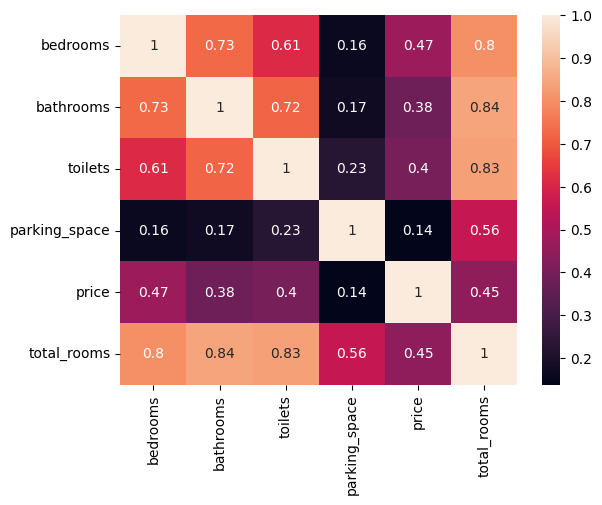

In [ ]:
corr = trimmed_df.select_dtypes("number").corr()
sns.heatmap(corr, annot=True)

In [ ]:
trimmed_df.select_dtypes("number").corr()

,bedrooms,bathrooms,toilets,parking_space,price,total_rooms
bedrooms,1.000000,0.727591,0.611700,0.159005,0.471885,0.800189
bathrooms,0.727591,1.000000,0.718544,0.174825,0.382409,0.843546
toilets,0.611700,0.718544,1.000000,0.226689,0.398630,0.832324
parking_space,0.159005,0.174825,0.226689,1.000000,0.138380,0.558609
price,0.471885,0.382409,0.398630,0.138380,1.000000,0.450422
total_rooms,0.800189,0.843546,0.832324,0.558609,0.450422,1.000000


Text(0, 0.5, 'price[#billions]')

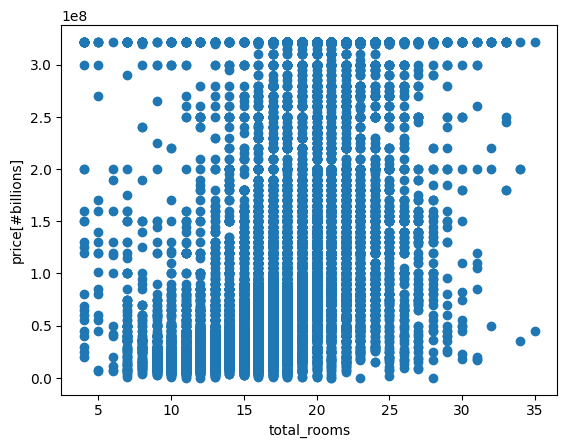

In [ ]:
# scatterplot of total_rooms and price
# it shows that The new feature created had a very poor correlation with the target variable.

plt.scatter(x = trimmed_df["total_rooms"], y = trimmed_df["price"])
plt.xlabel("total_rooms")
plt.ylabel("price[#billions]")

In [ ]:
# Drop multi-collinearity and low-cardinality features since feature not correlating with target
trimmed_df.drop(columns=["bathrooms", "toilets", "town", "total_rooms"], inplace=True)

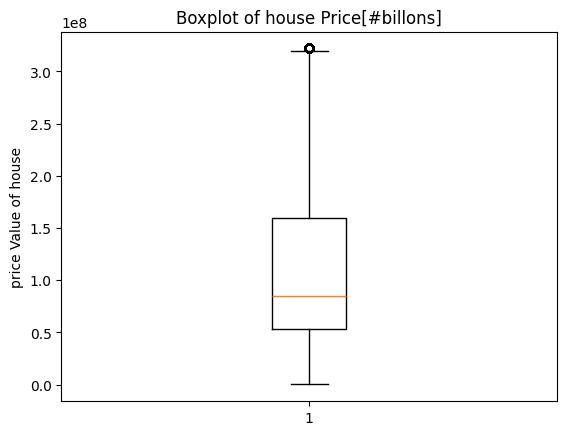

In [ ]:

plt.boxplot(trimmed_df["price"])
plt.title("Boxplot of house Price[#billons]")
plt.ylabel("price Value of house")
plt.show()

**Handle Outlier Values**

In [ ]:
Q1 = trimmed_df["price"].quantile(0.25)
Q2 = trimmed_df["price"].quantile(0.75)

  # second step: calculate inter-quartile range
IQR = Q2 - Q1

  # get the lower and upper bounds using 25th and 75th percentiles, and inter-quartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

  # floor the outliers: replace outliers with lower & upper bounds
trimmed_df["price"] = np.where(trimmed_df["price"] > upper_bound, upper_bound, trimmed_df["price"])


In [ ]:
print(trimmed_df.head())
print(len(trimmed_df))
trimmed_df.max()

   bedrooms  parking_space                 title  state        price
0         6              4       Detached Duplex  Abuja  320500000.0
1         4              4     Terraced Duplexes  Abuja  320500000.0
2         4              4       Detached Duplex  Lagos  120000000.0
3         4              6       Detached Duplex  Lagos   40000000.0
4         4              2  Semi Detached Duplex  Lagos   75000000.0
24146


,0
bedrooms,9
parking_space,9
title,Terraced Duplexes
state,Rivers
price,320500000.0


In [ ]:
trimmed_df["state"].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu'], dtype=object)

#**Split Data**

In [ ]:
target =  "price"
features = ["bedrooms","parking_space","title"]
y = trimmed_df[target]
X = trimmed_df[features]
print(X)
print(y)

       bedrooms  parking_space                 title
0             6              4       Detached Duplex
1             4              4     Terraced Duplexes
2             4              4       Detached Duplex
3             4              6       Detached Duplex
4             4              2  Semi Detached Duplex
...         ...            ...                   ...
24321         2              4        Block of Flats
24322         4              4        Block of Flats
24323         4              4       Detached Duplex
24324         3              3        Block of Flats
24325         4              4       Detached Duplex

[24146 rows x 3 columns]
0        320500000.0
1        320500000.0
2        120000000.0
3         40000000.0
4         75000000.0
            ...     
24321     15000000.0
24322     25000000.0
24323     68000000.0
24324     78000000.0
24325     65000000.0
Name: price, Length: 24146, dtype: float64


#**Train_Test_Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#**Test and Train Validation**

In [ ]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(19316, 3) (4830, 3) (19316,) (4830,)


In [ ]:
print(len(X_test))
print(round(len(X)*0.2))

4830
4829


#**Build Model**

#**Baseline**

In [ ]:
baseline_model = y_train.mean()

baseline_model

np.float64(122888285.6011079)

In [ ]:
# let's create predictions using the baseline model

# baseline_pred =

baseline_pred = [baseline_model] * len(y_test)

baseline_pred[0]

np.float64(122888285.6011079)

In [ ]:
baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("The mean price of y_train values is:", round(baseline_model, 2))
print("The baseline MAE is:", round(baseline_mae, 2))


The mean price of y_train values is: 122888285.6
The baseline MAE is: 77032009.54


#**Create and Fit Model**

In [ ]:
model = make_pipeline(OneHotEncoder(), SimpleImputer(), Ridge())

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['title'])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

#**Evaluate**

In [ ]:
# Calculate model MAE for training data

model_train_mae = mean_absolute_error(y_train, model.predict(X_train))

round(model_train_mae, 3)

62352238.752

In [ ]:
# print baseline and model (train) mae to compare both

print("The baseline MAE is:\t\t", round(baseline_mae, 2))
print("The model (train) MAE is:\t", round(model_train_mae, 2))

The baseline MAE is:		 77032009.54
The model (train) MAE is:	 62352238.75


In [ ]:
# model generates predictions off X_test values

model_test_pred = model.predict(X_test)

model_test_pred

array([6.23731370e+07, 1.60380850e+08, 1.57012624e+08, ...,
       1.63749076e+08, 9.24269281e+07, 1.50276172e+08])

In [ ]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

round(model_test_mae, 3)

62422800.338

In [ ]:
# print baseline model (train) and model (test) MAEs to compare the three of them

print("The baseline MAE is:\t\t", round(baseline_mae, 2))
print("The model (train) MAE is:\t", round(model_train_mae, 2))
print("The model (test) MAE is:\t", round(model_test_mae, 2))

The baseline MAE is:		 77032009.54
The model (train) MAE is:	 62352238.75
The model (test) MAE is:	 62422800.34




Interpretation of MAE Values

    model mae for train data (#62,352,238.75) is far lesser than the baseline mae (#77,032,009.75). This indicates that the model is performing well.
    model mae for train data (#62,352,238.75) is also very close to model mae for test data (#62,422,800.34). This is also an indicaation that the model generalises well.



In [ ]:
trimmed_df.iloc[4902]

,4935
bedrooms,3
parking_space,2
title,Block of Flats
state,Lagos
price,34900000.0


#**Result Communication**

In [ ]:
intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("intercept:", intercept)
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

intercept: -33139309.75460154
coefficients len: 9
[ 26685565.15800089   3368226.02752057   5351073.15449903
 -38911140.07693689  46619430.02417634]


In [ ]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names)

features len: 9
['bedrooms' 'parking_space' 'title_1' 'title_2' 'title_3' 'title_4'
 'title_5' 'title_6' 'title_7']


In [ ]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp

,0
bedrooms,2.668557e+07
parking_space,3.368226e+06
title_1,5.351073e+06
title_2,-3.891114e+07
title_3,4.661943e+07
title_4,1.083225e+07
title_5,-2.069035e+07
title_6,1.957366e+07
title_7,-2.277492e+07


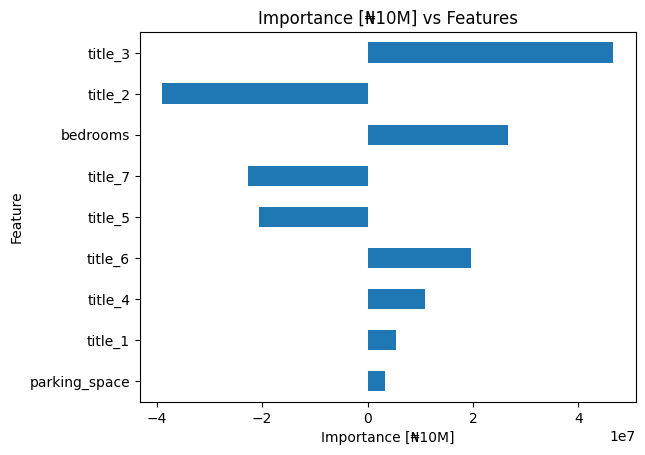

In [ ]:
feat_imp.sort_values(key=abs).plot(kind="barh")
plt.xlabel("Importance [₦10M]")
plt.ylabel("Feature")
plt.title("Importance [₦10M] vs Features");

#**Deploy**

#**make_prediction Function**

In [ ]:
def make_prediction(bedrooms, parking_space, house_type):
    data = {"bedrooms":bedrooms,
            "parking_space":parking_space,
            "title":house_type
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ₦{prediction}"

In [ ]:
make_prediction(4, 2, "Block of Flats")

'Predicted apartment price: ₦99913060.42'

#**Slider Widget**

In [ ]:
interact(
    make_prediction,
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
    ),
    parking_space=IntSlider(
        min=X_train["parking_space"].min(),
        max=X_train["parking_space"].max(),
        step=1,
        value=X_train["parking_space"].mean(),
    ),
    house_type=Dropdown(options=sorted(X_train["title"].unique())),
);

interactive(children=(IntSlider(value=4, description='bedrooms', max=9, min=1), IntSlider(value=4, description…

#**Streamlit Cloud**

**Save the Model**

In [ ]:
# Saving the model to model.pkl file on google drive, using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# verify the model is saved

!ls

drive  model.pkl  sample_data


**Streamlit Code**

In [ ]:
# strealit

%%writefile app.py

import pickle
import streamlit as st
import numpy as np
import pandas as pd


# Load your model file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title('Nigeria House Price Predictor App')

# Add input widgets for user inputs
title = st.selectbox(
    "title",
    ['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow']
)

bedrooms = st.slider("bedrooms", min_value=1, max_value=9, value=3)
parking_space = st.slider("parking_space", min_value=1, max_value=9, value=2)

# When the 'Predict' button is clicked
if st.button("Predict"):
    # Prepare the input data as a DataFrame (since pipelines often expect a DataFrame)
    input_data = pd.DataFrame({
        'bedrooms': [bedrooms],
        'parking_space': [parking_space],
        'title': [title]
    })
    prediction = model.predict(input_data)[0].round(2)
    st.write(f'The predicted apartment price is: #{prediction}')

Writing app.py




**requirements.txt** file Deploy the Streamlit app, a requirements.txt file has to be included in the github repository.

Run the code below to create the requirements.txt file.


In [ ]:
%%writefile requirements.txt

streamlit
scikit-learn
numpy
pickle4
category_encoders

Writing requirements.txt


Save file containing Streamlit code to local drive

In [ ]:
#check if app.py has been created on google drive
!ls

app.py	drive  model.pkl  requirements.txt  sample_data


In [ ]:
# save model.pkl to local drive
from google.colab import files
files.download("model.pkl")
files.download("app.py")
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>